In [480]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [481]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/Dataset/DataAnalysis.csv')
data0.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Original_label
0,98594,16,56153,589,80,6,28419,634487,1,1,0,0,0,0,0,0,0,0,0,0,0,3,634487,0,634487,634487,0,0,0,0,0,0,0,0,0,0,0,20,20,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,20,1,0,1,0,2145,519,0,20,0,0,0,0,0,0,0,0,0,BENIGN
1,549,17,1166,22,53,17,41495,54271,1,1,31,74,31,31,31,0,74,74,74,0,1934,36,54271,0,54271,54271,0,0,0,0,0,0,0,0,0,0,0,40,32,18,18,31,74,45,24,616,0,0,0,0,0,1,68,31,74,40,1,31,1,74,-1,-1,0,40,0,0,0,0,0,0,0,0,0,BENIGN
2,107831,16,60395,3586,80,6,36583,6968378,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6968378,0,6968378,6968378,6968378,6968378,0,6968378,6968378,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,40,2,0,0,0,1477,-1,0,20,0,0,0,0,0,0,0,0,0,BENIGN
3,36687,15,53059,149,443,6,31044,18380,1,1,0,0,0,0,0,0,0,0,0,0,0,108,18380,0,18380,18380,0,0,0,0,0,0,0,0,0,0,0,32,32,54,54,0,0,0,0,0,0,0,0,1,0,1,0,0,0,32,1,0,1,0,3541,74,0,32,0,0,0,0,0,0,0,0,0,BENIGN
4,105521,16,44537,3434,443,6,17053,70992911,5,6,219,257,219,0,43,97,138,0,42,56,6,0,7099291,20426476,64992917,35,5999952,1499988,2948994,5923395,94,70963105,14192621,28521897,65005020,35,0,168,200,0,0,0,219,39,71,5074,0,0,1,0,0,1,43,43,42,168,5,219,6,257,65535,114,1,32,38278,5524,42185,34372,35458156,41768459,64992917,5923395,0,BENIGN


In [482]:
# sizes = data0['Original_label'].value_counts(sort=1)
# print(sizes)

In [483]:
# sizes = data0['Label'].value_counts(sort=1)
# print(sizes)

In [484]:
# sizes = data0['Original_label'].value_counts(sort=1)
# print(sizes)

In [485]:
 # data0 = data0[['Label',' Timestamp',' CWE Flag Count',' Packet Length Std',' ACK Flag Count', ' Active Max', ' Active Std',' Average Packet Size', ' Avg Fwd Segment Size',' Bwd Header Length', ' Bwd IAT Max', ' Bwd Packet Length Min',' Bwd Packet Length Std', ' Bwd Packets/s', ' Destination IP',' Destination Port', ' Down/Up Ratio', ' Flow Duration',' Flow IAT Mean', ' Flow IAT Min', ' Flow IAT Std',' Fwd Header Length', ' Fwd IAT Max', ' Fwd IAT Min',' Fwd Packet Length Min', ' Fwd Packet Length Std',' Init_Win_bytes_backward', ' PSH Flag Count', ' SYN Flag Count',' Source IP', ' Source Port', ' URG Flag Count',' act_data_pkt_fwd', ' min_seg_size_forward', 'FIN Flag Count','Flow Bytes/s', 'Flow ID', 'Init_Win_bytes_forward']]
#data0 = data0[['Original_label','Label',' Bwd Header Length',' Flow Duration',' Bwd Header Length','Fwd IAT Total',' Idle Min',' Fwd IAT Min',' Fwd IAT Max',' min_seg_size_forward',' Idle Std',' Bwd IAT Std',' Flow IAT Min',' Bwd IAT Max',' Active Max',' Flow IAT Std','Flow Bytes/s',' Flow IAT Max',' Active Std']]
#data0 = data0[['Original_label','Label',' Fwd Packet Length Max',' Source IP',' Source Port','Flow ID',' Destination IP','Init_Win_bytes_backward']]
#data0 = data0[['Label','Init_Win_bytes_forward',' Flow Duration',' Init_Win_bytes_backward',' Fwd IAT Min',' Fwd IAT Max',' Fwd Packet Length Max',' Flow IAT Min',' Fwd IAT Mean',' Flow IAT Max',' Flow Packets/s','Fwd Packets/s']]
Anova = data0[['Label',' Active Max',' act_data_pkt_fwd',' Subflow Fwd Bytes','Total Length of Fwd Packets',' Flow IAT Mean','Fwd IAT Total',' Fwd IAT Max',' Flow IAT Max',' Fwd IAT Mean',' Total Fwd Packets','Subflow Fwd Packets',' Flow Duration']]
MI = data0[['Label',' Packet Length Variance',' Fwd IAT Mean',' Total Length of Bwd Packets',' Flow Duration',' Flow IAT Max',' Flow Packets/s','Fwd Packets/s',' Flow IAT Mean','Fwd IAT Total',' Subflow Fwd Bytes',' Subflow Bwd Bytes',' Fwd Packet Length Max',' Fwd IAT Max',' Flow IAT Min', ' Fwd IAT Min', ' Fwd Packet Length Std',' Init_Win_bytes_backward','Init_Win_bytes_forward']]
data0=Anova

In [486]:
dx = data0.query("Label == 5")
d0 = data0.query("Label == 0").sample(n=len(dx))
dd=pd.concat([d0,dx])
dd=pd.concat([d0,dx])
data0=dd

## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [487]:
#Checking the shape of the dataset
data0.shape

(9430, 13)

In [488]:
#Listing the features of the dataset
data0.columns

Index(['Label', ' Active Max', ' act_data_pkt_fwd', ' Subflow Fwd Bytes',
       'Total Length of Fwd Packets', ' Flow IAT Mean', 'Fwd IAT Total',
       ' Fwd IAT Max', ' Flow IAT Max', ' Fwd IAT Mean', ' Total Fwd Packets',
       'Subflow Fwd Packets', ' Flow Duration'],
      dtype='object')

In [489]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9430 entries, 10275 to 408942
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Label                        9430 non-null   int64
 1    Active Max                  9430 non-null   int64
 2    act_data_pkt_fwd            9430 non-null   int64
 3    Subflow Fwd Bytes           9430 non-null   int64
 4   Total Length of Fwd Packets  9430 non-null   int64
 5    Flow IAT Mean               9430 non-null   int64
 6   Fwd IAT Total                9430 non-null   int64
 7    Fwd IAT Max                 9430 non-null   int64
 8    Flow IAT Max                9430 non-null   int64
 9    Fwd IAT Mean                9430 non-null   int64
 10   Total Fwd Packets           9430 non-null   int64
 11  Subflow Fwd Packets          9430 non-null   int64
 12   Flow Duration               9430 non-null   int64
dtypes: int64(13)
memory usage: 1.0 MB


## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

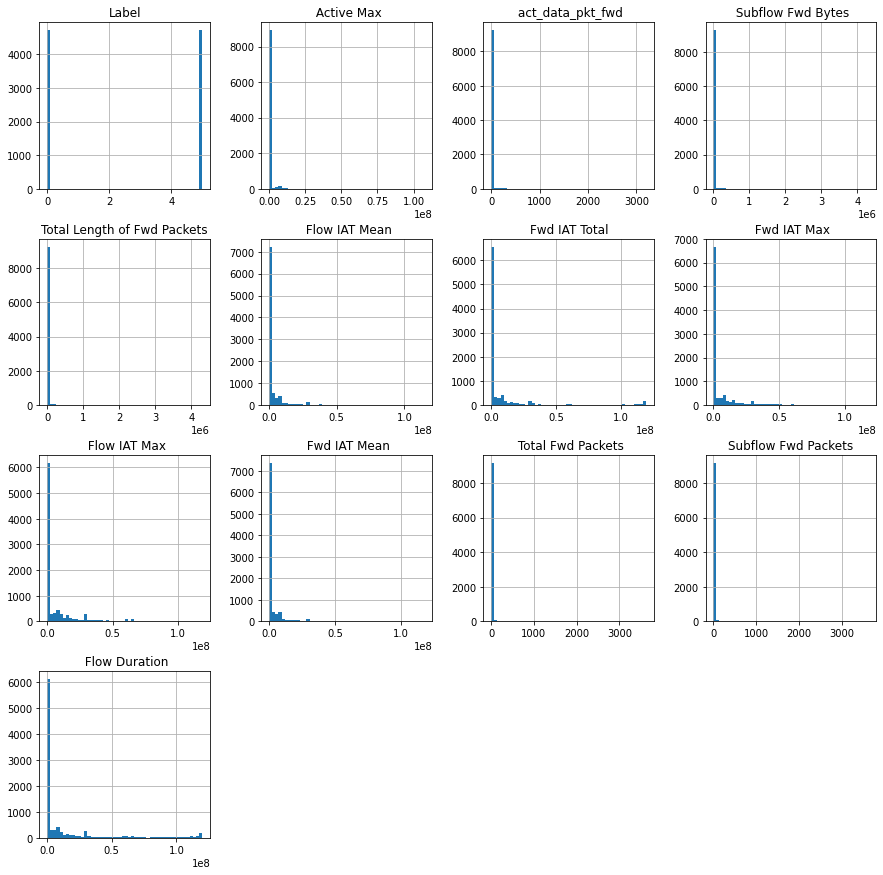

In [490]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

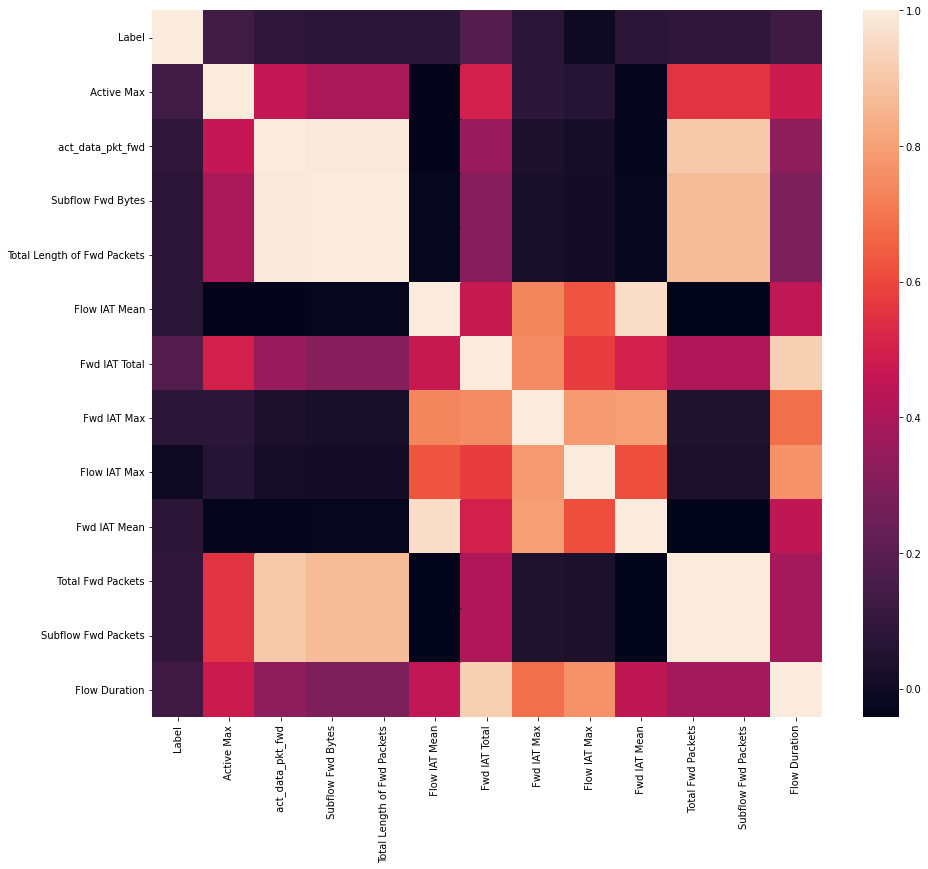

In [491]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [492]:
data0.describe()

,Label,Active Max,act_data_pkt_fwd,Subflow Fwd Bytes,Total Length of Fwd Packets,Flow IAT Mean,Fwd IAT Total,Fwd IAT Max,Flow IAT Max,Fwd IAT Mean,Total Fwd Packets,Subflow Fwd Packets,Flow Duration
count,9430.000000,9.430000e+03,9430.000000,9.430000e+03,9.430000e+03,9.430000e+03,9.430000e+03,9.430000e+03,9.430000e+03,9.430000e+03,9430.000000,9430.000000,9.430000e+03
mean,2.500000,9.469473e+05,8.983987,8.768590e+03,8.768590e+03,3.350104e+06,1.133133e+07,6.315320e+06,8.496955e+06,3.378222e+06,18.867656,18.867656,1.369719e+07
std,2.500133,5.871053e+06,84.322800,1.027876e+05,1.027876e+05,9.215690e+06,2.733270e+07,1.440561e+07,1.742037e+07,9.737053e+06,129.784941,129.784941,2.897353e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.109875e+04,0.000000e+00,0.000000e+00,4.627575e+04,0.000000e+00,1.000000,1.000000,5.073300e+04
50%,2.500000,0.000000e+00,0.000000,3.300000e+01,3.300000e+01,2.287350e+05,2.769880e+05,1.971000e+05,3.101365e+05,7.073650e+04,2.000000,2.000000,4.740095e+05
75%,5.000000,0.000000e+00,1.000000,3.380000e+02,3.380000e+02,1.944268e+06,6.251469e+06,5.595006e+06,7.999970e+06,1.847895e+06,5.000000,5.000000,9.266139e+06
max,5.000000,1.074960e+08,3211.000000,4.309688e+06,4.309688e+06,1.148707e+08,1.199995e+08,1.180098e+08,1.184575e+08,1.176280e+08,3632.000000,3632.000000,1.199997e+08


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [493]:
#Dropping the Domain column
# data = data0.drop(['Domain'], axis = 1).copy()
data = data0

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [494]:
#checking the data for null or missing values
data.isnull().sum()

Label                          0
 Active Max                    0
 act_data_pkt_fwd              0
 Subflow Fwd Bytes             0
Total Length of Fwd Packets    0
 Flow IAT Mean                 0
Fwd IAT Total                  0
 Fwd IAT Max                   0
 Flow IAT Max                  0
 Fwd IAT Mean                  0
 Total Fwd Packets             0
Subflow Fwd Packets            0
 Flow Duration                 0
dtype: int64

In [495]:
data.columns.values

array(['Label', ' Active Max', ' act_data_pkt_fwd', ' Subflow Fwd Bytes',
       'Total Length of Fwd Packets', ' Flow IAT Mean', 'Fwd IAT Total',
       ' Fwd IAT Max', ' Flow IAT Max', ' Fwd IAT Mean',
       ' Total Fwd Packets', 'Subflow Fwd Packets', ' Flow Duration'],
      dtype=object)

In [496]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Label,Active Max,act_data_pkt_fwd,Subflow Fwd Bytes,Total Length of Fwd Packets,Flow IAT Mean,Fwd IAT Total,Fwd IAT Max,Flow IAT Max,Fwd IAT Mean,Total Fwd Packets,Subflow Fwd Packets,Flow Duration
0,5,0,0,0,0,485933,485933,485933,485933,485933,2,2,485933
1,5,0,0,0,0,455175,455175,455175,455175,455175,2,2,455175
2,0,0,0,0,0,116368,0,0,116368,0,1,1,116368
3,0,0,0,0,0,145718,145718,145718,145718,145718,2,2,145718
4,0,0,0,31,31,19352,38704,38704,35844,38704,2,2,38704


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [497]:
from sklearn import tree
# feature_cols = ['Init_Win_bytes_forward',' Flow Duration',' Init_Win_bytes_backward',' Fwd IAT Min',' Flow IAT Max',' Fwd IAT Max',' Fwd Packet Length Max',' Flow IAT Min',' Fwd IAT Mean',' Flow IAT Max',' Flow Packets/s','Fwd Packets/s']
# y = data.Label # Target variable
# data = data.drop('Label',axis=1)
# X = data[feature_cols] # Features

# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)
# print(clf.tree_.max_depth)

((9430, 12), (9430,))

In [498]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 100)
X_train.shape, X_test.shape

((7072, 12), (2358, 12))

---------------------------------------------------------------------------------------

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* XGBoost

In [499]:
#importing packages
from sklearn.metrics import accuracy_score

In [500]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**


In [501]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# instantiate the model 
tree = DecisionTreeClassifier(max_depth =10)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [502]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [503]:

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# result = confusion_matrix(y_train,y_train_tree)
# result1 = classification_report(y_train,y_train_tree)
# print("Classification Report:",)
# print (result1)
# result2 = accuracy_score(y_train,y_train_tree)
# print("Accuracy:",result2)

In [504]:
#computing the accuracy of the model performance

precision_metric = precision_score(y_train,y_train_tree, average = "macro")
recall_metric = recall_score(y_train,y_train_tree, average = "macro")
accuracy_metric = accuracy_score(y_train,y_train_tree)
f1_metric = f1_score(y_train,y_train_tree, average = "macro")

print("DecisionTree: Accuracy on training Data: {:.3f}".format(accuracy_metric ))
print("DecisionTree: recall on training Data: {:.3f}".format(recall_metric))
print("DecisionTree: f1_metric on training Data: {:.3f}".format(f1_metric ))
print("DecisionTree: precision_metric on training Data: {:.3f}".format(precision_metric ))


DecisionTree: Accuracy on training Data: 0.852
DecisionTree: recall on training Data: 0.852
DecisionTree: f1_metric on training Data: 0.852
DecisionTree: precision_metric on training Data: 0.852


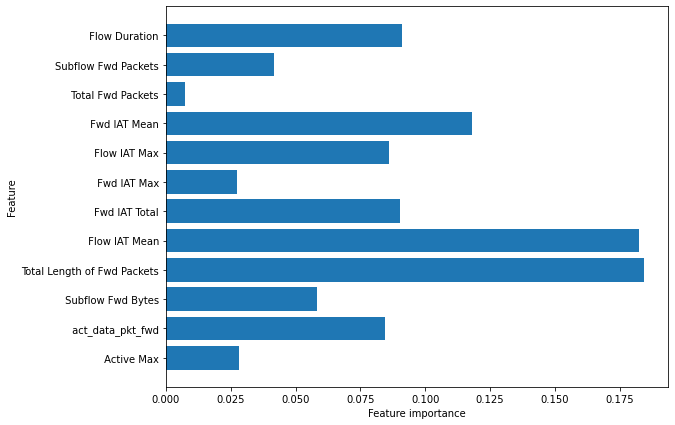

In [505]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [506]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
# storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [507]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [508]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [509]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

# print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
# print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


precision_metric = precision_score(y_train,y_train_forest, average = "macro")
recall_metric = recall_score(y_train,y_train_forest, average = "macro")
accuracy_metric = accuracy_score(y_train,y_train_forest)
f1_metric = f1_score(y_train,y_train_forest, average = "macro")

precision_metric1 = precision_score(y_test,y_test_forest, average = "macro")
recall_metric1 = recall_score(y_test,y_test_forest, average = "macro")
accuracy_metric1 = accuracy_score(y_test,y_test_forest)
f1_metric1 = f1_score(y_test,y_test_forest, average = "macro")


print("Random forest: Accuracy on training Data: {:.3f}".format((accuracy_metric +accuracy_metric1)/2 ))
print("Random forest: recall on training Data: {:.3f}".format((recall_metric +recall_metric1)/2 ))
print("Random forest: f1_metric on training Data: {:.3f}".format((f1_metric +f1_metric1)/2 ))
print("Random forest: precision_metric on training Data: {:.3f}".format((precision_metric +precision_metric1)/2 ))

Random forest: Accuracy on training Data: 0.775
Random forest: recall on training Data: 0.775
Random forest: f1_metric on training Data: 0.775
Random forest: precision_metric on training Data: 0.775


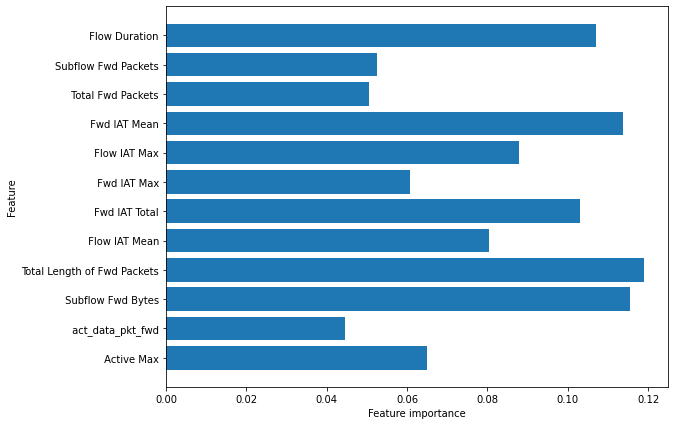

In [510]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [511]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [512]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [513]:
#XGBoost Classification model
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.25,max_depth=5)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.25, max_depth=5)

In [514]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [515]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

precision_metric = precision_score(y_train,y_train_xgb, average = "macro")
recall_metric = recall_score(y_train,y_train_xgb, average = "macro")
accuracy_metric = accuracy_score(y_train,y_train_xgb)
f1_metric = f1_score(y_train,y_train_xgb, average = "macro")

precision_metric1 = precision_score(y_test,y_test_xgb, average = "macro")
recall_metric1 = recall_score(y_test,y_test_xgb, average = "macro")
accuracy_metric1 = accuracy_score(y_test,y_test_xgb)
f1_metric1 = f1_score(y_test,y_test_xgb, average = "macro")


print("XGBoost: Accuracy on training Data: {:.3f}".format((accuracy_metric +accuracy_metric1)/2 ))
print("XGBoost: recall on training Data: {:.3f}".format((recall_metric +recall_metric1)/2 ))
print("XGBoost: f1_metric on training Data: {:.3f}".format((f1_metric +f1_metric1)/2 ))
print("XGBoost: precision_metric on training Data: {:.3f}".format((precision_metric +precision_metric1)/2 ))


XGBoost: Accuracy on training Data: 0.866
XGBoost: recall on training Data: 0.866
XGBoost: f1_metric on training Data: 0.866
XGBoost: precision_metric on training Data: 0.866


**Storing the results:**

In [516]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

**Storing the results:**

## **9. References**
* https://blog.keras.io/building-autoencoders-in-keras.html
* https://en.wikipedia.org/wiki/Autoencoder
* https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
* https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/